<a href="https://www.kaggle.com/code/sidhartha49/chat-bot-for-university?scriptVersionId=247996441" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# A Chat Bot for University

I used Tools & Libraries: Python, scikit-learn, NLTK, Pandas, Matplotlib, Seaborn
Techniques: NLP preprocessing, TF-IDF vectorization, KNN classification, intent recognition

**Description**:
I Built a chatbot to answer college related queries using an open source dataset (intents.json) from Kaggle. The project involved applying end-to-end NLP techniques to build a text classification system capable of mapping user inputs to predefined intents and generating relevant responses.

**My Contributions**:

structured the JSON dataset into a tabular DataFrame for easy manipulation.

Preprocessed user input patterns using NLTK:

Tokenization, lowercasing, removal of stopwords and punctuation

Applied stemming using PorterStemmer to reduce words to their base forms

Converted processed text into numerical vectors using TF-IDF Vectorizer.

Trained a K-Nearest Neighbors (KNN) classifier to predict user intent with an accuracy of ~72%.

Evaluated model performance with classification report and confusion matrix for each intent label.

Created an interactive chatbot loop, simulating real-time user interaction.

**Challenges in Error Solving**

Blank Outputs: Some patterns were reduced to empty strings after stemming. Added validation to skip or correct these rows during preprocessing.

Misclassified Greetings: The greeting tag consistently gave wrong responses. After analysis, realized class imbalance and semantic overlap with salutation and random tags. I added few Greetings input to train the bot to give more accurate answers.

Loop Errors in Kaggle: Got SyntaxError: break outside loop while running the chatbot loop in Kaggle. Fixed by using a separate block that handles one input per cell.

NLTK Resource Errors: Faced NLTK download failures on Kaggle (punkt, stopwords) — solved by running download commands at the top.






In [1]:
import json

# Load original file from Kaggle input 
with open('/kaggle/input/chatbot-dataset/intents.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Fix the greeting responses and patterns as they are not proper.
for intent in data['intents']:
    if intent['tag'] == 'greeting':
        intent['patterns'] = [
            "hi", "hello", "hey", "how are you", "good morning", "good evening",
            "what's up", "how's it going", "hiya", "yo", "sup"
        ]
        intent['responses'] = [
            "Hello! How can I help you?",
            "Hi there! Ask me anything about the college.",
            "Hey! What would you like to know?"
        ]
        break  
# Save the updated JSON file to working directory
with open('//kaggle/working//intents_fixed.json', 'w', encoding='utf-8') as outfile:
    json.dump(data, outfile, indent=4, ensure_ascii=False)

print("✔ intents_fixed.json saved successfully.")

✔ intents_fixed.json saved successfully.


In [2]:
import json
import pandas as pd

#  Load the fixed intents JSON file properly
with open('intents_fixed.json', 'r', encoding='utf-8') as file:
    data = json.load(file)  

#  Convert the JSON data to a DataFrame
rows = []
for intent in data['intents']:
    for pattern in intent['patterns']:
        rows.append({'pattern': pattern, 'tag': intent['tag']})

df = pd.DataFrame(rows)

#  Check first 20 rows
print(df.head(20))


              pattern       tag
0                  hi  greeting
1               hello  greeting
2                 hey  greeting
3         how are you  greeting
4        good morning  greeting
5        good evening  greeting
6           what's up  greeting
7      how's it going  greeting
8                hiya  greeting
9                  yo  greeting
10                sup  greeting
11                cya   goodbye
12            see you   goodbye
13            bye bye   goodbye
14      See you later   goodbye
15            Goodbye   goodbye
16       I am Leaving   goodbye
17                Bye   goodbye
18    Have a Good day   goodbye
19  talk to you later   goodbye


In [3]:
# check the columns
df.columns

Index(['pattern', 'tag'], dtype='object')

In [4]:
#check the shape
df.shape


(406, 2)

**NLP Preprocessing**

In [5]:
#import libraries used for NLP Preprocessing
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import string

nltk.data.path.append("/usr/share/nltk_data")


# Initialize the stemmer and stop words
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Tokenize the text
def preprocess_text(text):
    
    # Tokenization splits the text into words
    tokens = nltk.word_tokenize(text)   
    # Convert to lowercase, remove punctuation, stop words, and stem the words
    tokens=[w.lower() for w in tokens if w.isalpha()]
    tokens=[w for w in tokens if w not in stop_words]
    tokeens=[stemmer.stem(w) for w in tokens]
    return" ".join(tokeens)

In [6]:
#Apply preprocessed patters to actual patterns
df["processed_pattern"]= df['pattern'].apply(preprocess_text)

In [7]:
# now lets see the table
df.head()

,pattern,tag,processed_pattern
0,hi,greeting,hi
1,hello,greeting,hello
2,hey,greeting,hey
3,how are you,greeting,
4,good morning,greeting,good morn


**Lets remove the blank coloumns**

In [8]:
# Removes blank columns
df = df[df['processed_pattern'].str.strip() != ""]

In [9]:
df.head()

,pattern,tag,processed_pattern
0,hi,greeting,hi
1,hello,greeting,hello
2,hey,greeting,hey
4,good morning,greeting,good morn
5,good evening,greeting,good even


**Convertting text to numbers using TF-IDF Vectorization**

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
# Fit and transform the processed patterns
x =vectorizer.fit_transform(df['processed_pattern'])
y= df['tag']


**Lets split the data into train and test**

In [11]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=42)


**Lets apply KNN Classification model**

In [12]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier
model = KNeighborsClassifier(n_neighbors=3)
# Train the model
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

**Model evaluation with Accuracy score and Classification report**

In [13]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions on the test set
y_pred= model.predict(x_test)

# Evaluate the model
print('Accuracy', accuracy_score(y_test,y_pred))
print('\nClassification Report\n', classification_report(y_test,y_pred))

Accuracy 0.7625

Classification Report
                 precision    recall  f1-score   support

     admission       0.50      1.00      0.67         1
       canteen       0.00      0.00      0.00         0
college intake       1.00      1.00      1.00         1
     committee       1.00      1.00      1.00         1
   computerhod       1.00      1.00      1.00         2
        course       1.00      0.86      0.92         7
       creator       1.00      1.00      1.00         5
      document       0.80      1.00      0.89         4
         event       0.00      0.00      0.00         1
    facilities       1.00      1.00      1.00         1
          fees       1.00      0.83      0.91         6
       goodbye       0.50      0.33      0.40         3
      greeting       0.00      0.00      0.00         3
           hod       0.00      0.00      0.00         1
        hostel       0.75      0.75      0.75         4
         hours       1.00      1.00      1.00         4
       

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.

**Visualizing using confusion matrix**

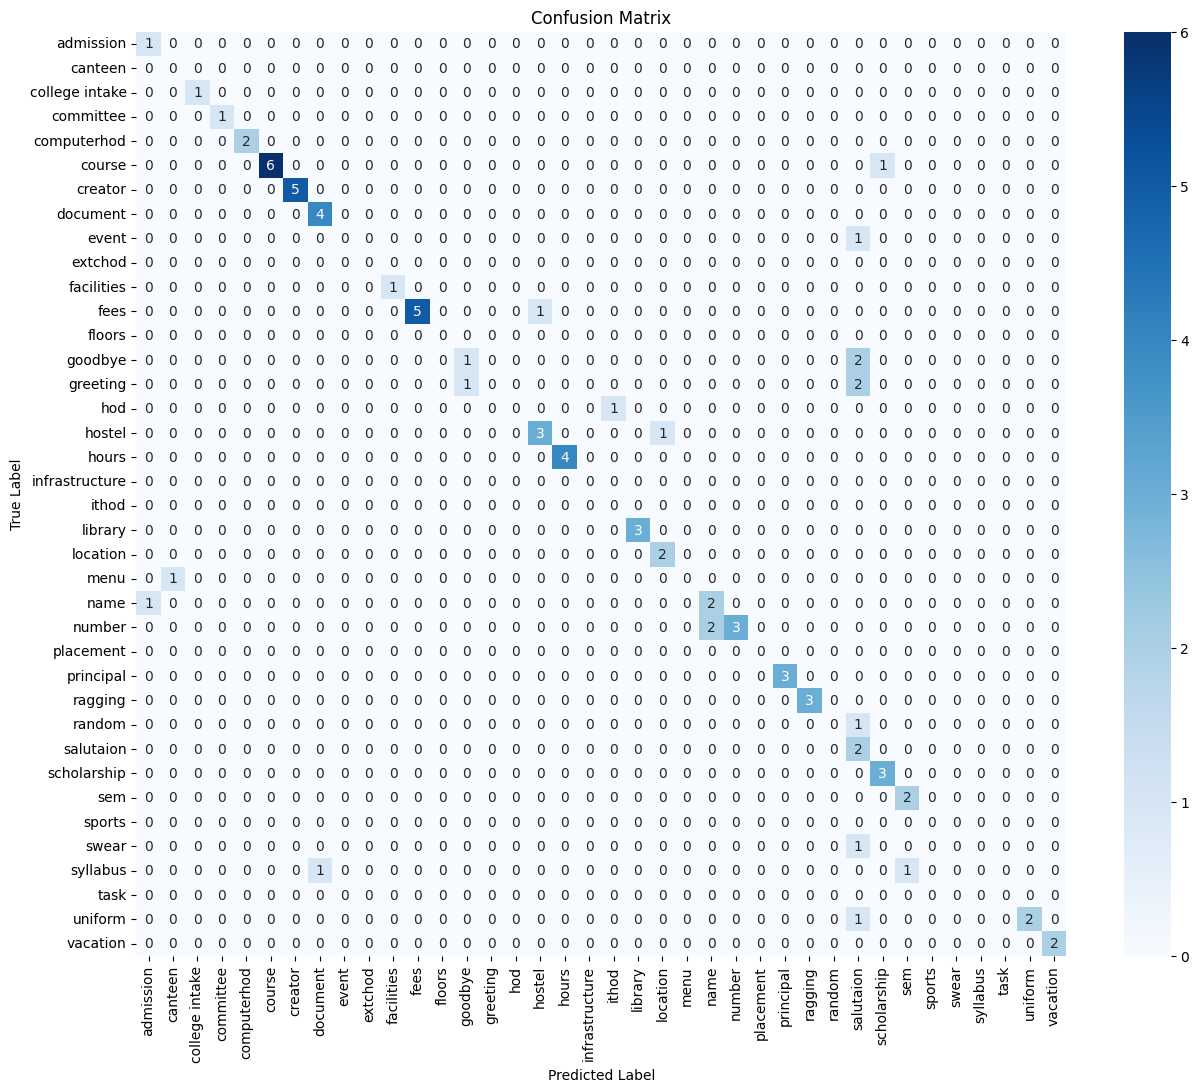

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plot the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=model.classes_,
            yticklabels=model.classes_,
            cmap='Blues')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


**Lets Prepare a Chat Bot Here **

In [15]:
import random
import nltk
import numpy as np

# Function to preprocess input (we must define preprocess_text earlier)
def get_response(user_input, model, vectorizer, intents_data):
    processed_input = preprocess_text(user_input)  # Preprocess user input
    vec_input = vectorizer.transform([processed_input])  # Convert to same vector format
    predicted_tag = model.predict(vec_input)[0]  # Predict class

    # Match predicted tag with intent
    for intent in intents_data['intents']:
        if intent['tag'] == predicted_tag:
            return random.choice(intent['responses'])

    return "I'm sorry, I don't understand that."


**Plese put the question in the input and the bot replies**

In [16]:
# Simulate user input (Kaggle safe)
user_input = "who is your principal"

# Then proceed as normal
if user_input.lower() in ['exit', 'quit']:
    print("Bot: Goodbye!")
else:
    response = get_response(user_input, model, vectorizer, data)
    print("Bot:", response)


Bot: XYZ is college principal and if you need any help then call your branch hod first.That is more appropriate
